# Introduction:
Welcome! In this tutorial, you will learn about the reinforcement learning algorithm and how to leverage it using the PyBrain Library. 

Reinforcement learning is characterized by the following traits:

    We don't know how to classify some set of data.
    We do know how to punish or reward a classification of the data

You may wonder, when do we encounter a problem where we have these conditions? The short answer is everywhere, but if you look towards the fields of artificial intelligence and robotics, you'll find many such examples.


Take for instance, catching a ball. What exactly makes an attempt at a catch good? We can't pinpoint the exact movements that the hand needs to do to successfully catch a ball, but we can definitively say whether or not the ball was caught. It's problems like these that are best tackled using reinforcment learning

![](robotball.png)

In PyBrain, reinforcement learning problems always have 3 main components, an Environment, an Agent, and a Task. On a high level, Environments define the exact space that the problem exists in, the Agent is the thing that is learning how to solve the problem, and the Task facilatates the interaction between the 2. These 3 components are bundled together and minupulated with an Experiment

In this tutorial we will show how to use PyBrain to solve the maze navigation problem and then leverage PyBrain's reinforcement learning to learn the how to beat a simple fighting game AI.

With that in mind, let's begin the tutorial

# Installation:

First, download the repository to the folder that this Jupyter notebook is in. This can be done by running the following command in your terminal

	git clone git://github.com/pybrain/pybrain.git

Now, go into the pybrain folder you just acquired and then run this command to install pybrain.

	python setup.py install
    
After everything is installed, verify that the installation was successful by ensuring that the following imports work.

In [19]:
from scipy import *
import sys, time

from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, SARSA
from pybrain.rl.experiments import Experiment
from pybrain.rl.environments import Task

# Environment

For the maze navigation problem, we need to create the environment by making an actual maze. To do so, we need to create and then pass a 2D array into the the Maze environment that comes with the PyBrain Library.

The 1's represent walls of the maze, whereas the 0's represent open spaces. The 2nd argument to the environment specifies the goal

In [20]:
structure = array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 1, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1]])

environment = Maze(structure, (7, 7))

Verify that the environment is properly constructed by visualizing it with mathplotlib.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


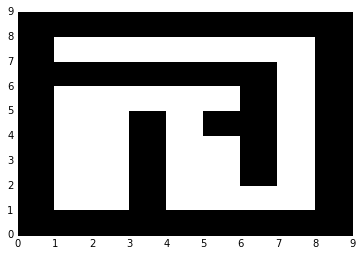

In [21]:
#replace this visualization code in the future
%pylab inline
import pylab
import numpy as np

def drawMaze(mazeArray):
    pylab.gray()
    pylab.ion()

    pylab.pcolor(mazeArray)
    pylab.draw()
    
drawMaze(map(lambda x: 1-x, environment.mazeTable))

# Agent

Now that we've set up the environment, we need an agent that will interact with it. The agent consists of a learner, a controller and an explorer. The learner tells the agent how to learn from the rewards it gets, the controller is essentially the "memory" of the agent, and the explorer informs the agent of how to explore the state space. The default agent that comes with PyBrain already has an explorer, so we'll ignore that component

# Learner
The learner that we'll be using in this tutorial is the Q-learner. In Q-learning, the agent keeps track of a set of states and the reward associated with each action it can take at that state. The reward of each action is updated as the agent goes through many iterations.

In [22]:
learner = Q()

# Controller:
Because our agent uses the Q-learner, the controller we use will need to implement the ActionValueInterface. This will keep track of the reward associated with taking an action <b>A</b> in state <b>S</b>.

In [23]:
controller = ActionValueTable(81, 4) #argument 1 is the number of states that the agent can be in
                                     #argument 2 is the number of actions that can be taken
                                     #for a 9x9 maze, there are 81 positions the agent can be in, and the agent can 
                                     #choose to move north, south, east or west
controller.initialize(1.)            #Initializing the table with 1 everywhere ensures that all states are "visited" 
                                     #at the start

We can now combine these 2 components to create the agent

In [24]:
agent = LearningAgent(controller, learner)

# Task

The last thing we need to do is provide a way for the agent to interact with the environment. This will be done through the task, a construct which specifies when a single learning session is over, the goal in the environment, and the reward that the agent gets for its actions.

For the maze navigation problem, PyBrain already comes with a task, the MDPMazeTask

In [25]:
task = MDPMazeTask(environment)

This task knows where the agent is in the maze and will be able to inform the agent of what actions they can take

We now can create the experiment, the whole construct which has the agent preform the task, and have it interact with the environment

In [26]:
experiment = Experiment(task, agent)

You can see the results of the interaction by visualizing it below

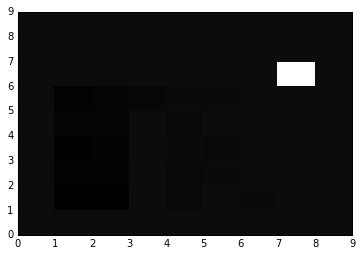

In [27]:
experiment.doInteractions(500)   #the agent takes 500 "steps" in the environment
agent.learn()                    #Saves the results of the last set of interactions
agent.reset()                    #resets the position of the agent
drawMaze(controller.params.reshape(81,4).max(1).reshape(9,9))

You can see the maze become more defined if you choose to run more interactions. Because controller stores the "memory" of the agent, you'll have to reinitialize the controller and the agent to retrain it from the beginning

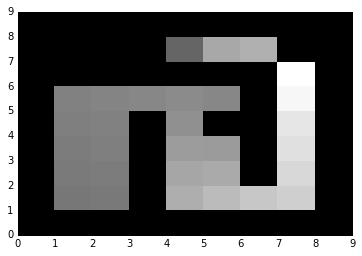

In [50]:
controller = ActionValueTable(81, 4) #argument 1 is the number of states that the agent can be in
                                     #argument 2 is the number of actions that can be taken
                                     #for a 9x9 maze, there are 81 positions the agent can be in, and the agent can 
                                     #choose to move north, south, east or wet
controller.initialize(1.)  
agent = LearningAgent(controller, learner)

experiment = Experiment(task, agent)
experiment.doInteractions(10000)
agent.learn()
agent.reset()

pylab.pcolor(controller.params.reshape(81,4).max(1).reshape(9,9))
pylab.draw()

As you can see, more interactions gives the agent a better understanding of the maze environment

# Creating your own RL modules

We will now leverage PyBrain to solve our own RL modules. In this problem, we are simulating the experience of playing a fighting game and want to train an AI to defeat a simple, unchanging opponent.

# Defining the Game

In this simplified fighting game, the goal is to reduce the opponents health to 0 before the time runs out. The opponent for this problem is a simple static AI that will block differently depending on the attacks it has seen previously. The agent is the attacker and can choose to use a high, low, or special attack, or it can choose to delay its next attack. 

# Setting up the environment

In order to proceed, we first have to set up our own environment for this scenario. To do so, we will first need to define important parameters that our problem requires us to keep track of, followed by satisfying PyBrain's Environment Interface

# Environment Parameters

When defining the environment, we need to describe the actions that can be done as well as the things in the world that are affected by those actions. As described previously our actions are to attack high or low, use a resource called "meter" to perform a strong special attack, or to delay our next attack. As for thing affected by these actions, in the case of the fighting game, we care about the health of the enemy, the meter that you have built up, and the time remaining. Since the agent is also able to delay their attack, we also need to keep track of the time since the last attack. 

In [51]:
from pybrain.utilities import Named
from pybrain.rl.environments.environment import Environment

from collections import Counter
from random import random, choice
from enum import Enum

#Defines the kind of attack that is done
class Attack(Enum):
    high = 0
    low = 1
    unblockable = 2
    delay = 3

""" A fighting game simulation, actions are the attack you choose to do (high attack, low attack
special attack) and observations being the damage done by your sequence of attacks. 

The opponent can only block high or low.
High attacks are slower than low attacks, but build more meter and do more damage
Low attacks are faster than high attacks.
Special attacks do a lot of damage and can't be blocked, but you need to generate 5 meter to use them.
You get meter by hitting the opponent

There is a single agent who does the attacking
An attack is either completely blocked or damages the defending AI

Every state can have an an associated reward (the health of the enemy/the meter that you currently have/time remaining).
"""
class FightGame(Environment, Named):
    # attacks. Notation is (<high/low/unblockable/misc>, damage, meter gain, startup_delay)
    high = (Attack.high, 2, 2, 2)
    low = (Attack.low, 1, 1, 1)
    special = (Attack.unblockable, 10, -5, 4)
    delay = (Attack.delay, 0, 0, 1)

    allActions = [high, low, special,delay]

Because the opponent blocks based on the previous history of attacks, we also need to keep track of the its patterns for blocking attacks and a history of the attacks it has seen.

We will story the opponent's blocking patterns as a dictionary, where a tuple of previous history is the key and the values are an array of the directions that the opponent will block given that history. The reason that its stored as an array is because the opponent varies its guard as time passes between attacks.

In [30]:
    # a table which determines if the opponent blocks high or low
    # the keys are a tuple of the last n moves done by the opponent. The values are a table which determines if the 
    # opponent is blocking high or low since the last attack.
    blockTable = None
    
    # a tuple of the previous n moves that were done
    history = None

Because we need a finite number of states to use the Q-learning algorithm, we also need to cap the health of the opponent, the meter that the agent can have, the amount of time, and the history that the opponent remembers


In [31]:
    #Defines the maximum amounts of the various variables
    maxHealth = 0   #the maximum health
    maxMeter = 10   #the maximum meter
    maxTime = 0     #the starting time
    n = 0           #the amount of history we remember
    maxDelay = 0    #the maximum amount of time where delay is meaningful. For simplicity this will be n

We finish this section by initializing everything in the constructor and packaging key variables in a gameState tuple

In [32]:
    # starting health/meter you have/time remaining/time since the last action
    startState = None

    #current state
    gameState = None

    def __init__(self, blockTable, n, startingHealth, startingMeter, startingTime, **args):
        self.setArgs(**args)
        self.blockTable = blockTable

        self.maxHealth = startingHealth
        self.maxMeter = 10
        self.maxTime = startingTime
        self.n = n
        self.maxDelay = self.n

        self.history = (Attack.delay,) * n
        if self.startState == None:
            self.startState = (startingHealth, startingMeter, startingTime, 0)
        self.reset()

# Environment Interface

We now need to fill in the interface methods <b>getSensors</b>, <b>reset</b>, and <b>performAction</b>.  We'll be going through each of these on their own

# getSensors()

This function is used to inform the agent about the current state of the world. Seeing that we have the world state encapsulated in the gameState tuple, we just return that. Note that the interface requires the state to be packaged in an array.

In [33]:
    def getSensors(self):
        """ the currently visible state of the world (the observation may be
            stochastic - repeated calls returning different values)

            :rtype: by default, this is assumed to be a numpy array of doubles
            :note: This function is abstract and has to be implemented.
        """
        obs = zeros(1)
        obs[0] = self.gameState
        return obs

# reset()

This function is used to reinitialize the environment. We do this by setting our gameState to out startState

In [34]:
    def reset(self):
        self.gameState = self.startState

# performAction(action)

This function handles the most complicated part, changing the environment in response to an action.

The first thing we'll do is define a function to return a random way to block. This is neccessary because if we see a pattern that is not coded into our history, we still need the opponent to block in a random direction



In [35]:
    def randomBlock(self):
        block = choice([Attack.high, Attack.low])
        return block

Now for everything else. Essentially, we need to update the history with the last move that was used, and depending on the move used and how the opponent blocked, apply the appropriate damage, meter and time calculations. 

In [36]:
    def performAction(self, action):
        currentHealth = self.gameState[0]
        currentMeter = self.gameState[1]
        currentTime = self.gameState[2]
        currentDelay = self.gameState[3]

        attack = self.allActions[action]
        attackType = attack[0]
        attackDamage = attack[1]
        attackMeter = attack[2]
        attackTime = attack[3]
        
        newHealth = max(currentHealth - attackDamage, 0)
        newMeter = min(currentMeter + attackMeter, self.maxMeter)
        newTime = max(currentTime - attackTime,0)

        #determining how the opponent blocks. This is done by finding the current pattern of blocking
        #using the current history and then indexing into that by using the delay
        if(self.history not in self.blockTable):
            blockType = self.randomBlock()
        else:
            timeIndex = (currentDelay + attackTime - 1) % len(self.blockTable[self.history])
            blockType = self.blockTable[self.history][timeIndex]
        
        #updating the history with the latest attack used
        self.history = self.history[1:] + (attackType, )
            
        #Here different logic happens depending on the attack used
        if attackType == Attack.delay:    #Here we simply increase the delay time
            self.gameState = (newHealth, newMeter, newTime, currentDelay + attackTime)
        if attackType == Attack.unblockable:
            if(newMeter >= 0):            #If we have enough meter to use the special attack, we do so
                self.gameState = (newHealth, newMeter, newTime, 0)
            else:                         #Otherwise we are unable to and it's essentially a longer delay
                self.gameState = (currentHealth, currentMeter, newTime, currentDelay + attackTime)
        #here we check our block table to see what happens
        #If an attack hits the opponent loses health and the agent gains meter
        #otherwise nothing happens
        if attackType == Attack.high:
            if(blockType == Attack.high):
                self.gameState = (currentHealth, currentMeter, newTime, 0)
            else:
                self.gameState = (newHealth, newMeter, newTime, 0)
        if attackType == Attack.low:
            if(blockType == Attack.low):
                self.gameState = (currentHealth, currentMeter, newTime, 0)
            else:
                self.gameState = (newHealth, newMeter, newTime, 0)

# Initializing the FightGame

Initializing the environment can be incredibly simple or very complex depending on how you want the opponent to behave. For the sake of simplicity, have the opponent that remember the previous 2 moves and only block low after seeing 2 low attacks, or after getting hit by an unblockable attack. Otherwise, it always blocks high.

Our parameters for health and time will be relatively small, as the agent will learn more quickly with a smaller state space

In [37]:
from FightGame import *

structure = dict()
structure[(Attack.delay, Attack.delay)] = [Attack.high]
structure[(Attack.delay, Attack.low)] = [Attack.high,Attack.high]
structure[(Attack.delay, Attack.high)] = [Attack.high,Attack.high]
structure[(Attack.delay, Attack.unblockable)] = [Attack.low]

structure[(Attack.high, Attack.delay)] = [Attack.high,Attack.high]
structure[(Attack.high, Attack.high)] = [Attack.high,Attack.high]
structure[(Attack.high, Attack.low)] = [Attack.high,Attack.high]
structure[(Attack.high, Attack.unblockable)] = [Attack.low]

structure[(Attack.low, Attack.low)] = [Attack.low]
structure[(Attack.low, Attack.unblockable)] = [Attack.low]
structure[(Attack.low, Attack.high)] = [Attack.high,Attack.high]
structure[(Attack.low, Attack.delay)] = [Attack.high,Attack.high]

structure[(Attack.unblockable, Attack.delay)] = [Attack.high,Attack.high]
structure[(Attack.unblockable, Attack.high)] = [Attack.high,Attack.high]
structure[(Attack.unblockable, Attack.low)] = [Attack.high,Attack.high]
structure[(Attack.unblockable, Attack.unblockable)] = [Attack.low]

health = 5
meter = 0
time = 25
historyLen = 2

fightEnv = FightGame(structure, historyLen, health, meter, time)

# Creating an Agent

We need to create another agent for this problem. Since we're still using the Q-learner, we don't have to change much. We do however, need to modify our controller to account for the new state space and the action that we are allowed to do in this environment

In [54]:
fightLearner = Q()    

fightController = ActionValueTable((fightEnv.maxHealth+1) * (fightEnv.maxMeter+1) \
                                   * (fightEnv.maxTime+1) * (fightEnv.maxDelay+1), 4) 
                    
fightController.initialize(1.)      #Initializing the table with 1 everywhere ensures that all states are "visited" 
                                    #at the start
fightAgent = LearningAgent(fightController, fightLearner)

# Creating a Task

The last thing we need to do is to create the task. Since the task is used to facilitate interaction between the agent and the environment, we only need to fill in each of it's interface methods, <b>getReward</b>, <b>performAction</b> and <b>getObservation</b>

# getReward()

We need to determine the reward that the agent should get for doing an action. While we could simply give a positive reward if the agent defeats the opponent and a negative reward if the time runs out, we have a slightly better understanding of how to classify a sequence of moves than that. Namely, we know that an action is "good" if it does more damage to the opponent. Thus, we give the damage done to the opponent as a reward, and in the case where the opponent is defeated, give a massive reward in the form of the opponent's maximum health

In [55]:
from pybrain.rl.environments import Task
from scipy import array

class FightTask(Task):
    #metadata used for tracking wins and losses. Used primarily for showing the results of the algorithm
    wins = 0 
    losses = 0 
            
    def getReward(self):
        """ compute and return the current reward (i.e. corresponding to the last action performed) """
        if(self.env.gameState[0] < self.currentHealth):
            if self.env.gameState[0] <= 0:   #the opponent has 0 health, the agent won
                self.env.reset()
                reward = self.env.maxHealth
                self.wins += 1
            else:
                reward = self.currentHealth - self.env.gameState[0]
        elif self.env.gameState[2] <= 0:#    the time ran out, the agent lost
            self.env.reset()
            #print "defeat"
            reward = -self.env.gameState[0]
            self.losses += 1
        else:
            reward = 0.
        return reward

# performAction(action)

Here, we do the default behavior, and allow the super class to have the agent perform the action selected. By default, the action argument passed is a vector whose only element is the integer representation of the action we want to do

In [56]:
    def performAction(self, action):
        """ The action vector is stripped and the only element is cast to integer and given
            to the super class.
        """
        Task.performAction(self, int(action[0]))


# getObservation()

This function is used to map the observations we get from the game into a particular state. Since we set the number of states precisely according to the range of values that the observations can take on, we can do a direct mapping.

In [57]:
    def getObservation(self):
        self.currentHealth = self.env.gameState[0]
        self.currentMeter = self.env.gameState[1]
        self.currentTime = self.env.gameState[2]
        self.currentDelay = self.env.gameState[3]
        
        
        #If this mapping is confusing, consider if we had a cube whose dimensions were (x,y,z).
        #If we want to map the point (3, 5, 8), we first advance 3 units along the x axis,
        #passing by 3 planes of area y*z. We then advance 5 units up the y axis, passing
        #5 rows which have z elements in them. Lastly, we advance 8 units down the z axis.
        #In total, the number of elements we passed were 3yz + 5z + 8. This methodlogy
        #provides a 1 to 1 mapping of 3d space to 1d space. We can expand this to 4d
        #space to correctly map our gameState in this instance.
        index = self.currentHealth * self.env.maxMeter * self.env.maxTime * self.env.maxDelay + \
                self.currentMeter * self.env.maxTime * self.env.maxDelay + \
                self.currentTime * self.env.maxDelay + \
                self.currentDelay
        obs = array([index])
        return obs

# Putting it all together

Now, we can combine all of the above components and run our experiment. 

Over 10 iterations where each iteration has 1000 interactions, we see the win rate of the agent increase dramtically!

In [58]:
from FightTask import *

fightTask = FightTask(fightEnv)
fightTask.verbose = True
experiment = Experiment(fightTask, fightAgent)
iterationCount = 10
for i in range(iterationCount):
    experiment.doInteractions(1000)
    print "Wins: ", fightTask.wins, "Losses: ", fightTask.losses
    fightTask.wins = 0
    fightTask.losses = 0
    fightAgent.learn()
    fightAgent.reset()

Wins:  41 Losses:  49
Wins:  102 Losses:  13
Wins:  91 Losses:  13
Wins:  91 Losses:  14
Wins:  95 Losses:  9
Wins:  100 Losses:  6
Wins:  93 Losses:  13
Wins:  103 Losses:  6
Wins:  97 Losses:  9
Wins:  145 Losses:  3


# Going Further

In this instance, the opponent has a very simplistic behavior pattern. If we wanted to test the capabilities of the reinforcement learning algorithm further, we could give it even more complex patterns and make it remember more history. We could also make the scenario more complex, adding more tasks or more conditions for the agent to consider. All of this would dramatically increase our state space, and likely make our reinforcement learning AI perform worse, as the expanded state space would mean that it takes longer to figure out the optimal way to reach its goal.

Reducing our state space would solve this! Doing things like splitting the spectrum of some of the parameters into buckets (full health, low health etc.) would greatly reduce the number of states introduced by those factors. Tweaking our reward function to include things like meter gained would also improve the performance. 

These optimizations vary from design space to design space, but by taking note of them, you can dramatically improve the results of your reinforcment learning experience.

# Additional Resources

PyBrain API: http://pybrain.org/docs/

Various AI techniques for Fighting Games: http://cs229.stanford.edu/proj2008/RicciardiThill-AdaptiveAIForFightingGames.pdf